# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 读取数据

导入和阅读 Penguins.csv文件

In [9]:
original_data = pd.read_csv("Penguins.csv")

## 评估数据结构

在这一部分中，我们将对在上一部分建立的`original_data``DataFrame`所包含的数据进行评估和清理。

主要从两个方面进行：结构和内容，即整齐度和干净度。

数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

为了区分开经过清理的数据和原始的数据，我们创建新的变量`cleaned_data`，让它为`original_data`复制出的副本。我们之后的清理步骤都将被运用在`cleaned_data`上。

In [12]:
cleaned_data = original_data.copy()

### 数据整齐度

In [14]:
cleaned_data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


从头部的10行数据来看，数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

### 数据干净度

In [17]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


从输出结果来看，`cleaned_data`数据共有344条观察值，`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`变量存在缺失值，将在后续进行评估和清理。

数据类型方面，我们已知`species`（企鹅种类）`sex`（企鹅性别）、`island`（企鹅所在岛）都是分类数据，因此可以把数据类型都转换为Category。

In [19]:
cleaned_data["species"] = cleaned_data["species"].astype("category")

In [20]:
cleaned_data["sex"] = cleaned_data["sex"].astype("category")

In [21]:
cleaned_data["island"] = cleaned_data["island"].astype("category")

是否改变这些值的种类

In [23]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


### 处理丢失数据

从`info`方法的输出来看，在`cleaned_data`中，`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`、`sex`变量存在缺失值。

先提取出缺失这些变量的观察值进行查看。

In [26]:
cleaned_data.query("culmen_length_mm.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [27]:
cleaned_data.query("culmen_depth_mm.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [28]:
cleaned_data.query("flipper_length_mm.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [29]:
cleaned_data.query("body_mass_g.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [30]:
cleaned_data.query("sex.isnull()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


看出来`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`值的NaN值丢失。进行删除处理

`sex`的缺失值，在其他中还是继续有用。可以保留。

In [32]:
cleaned_data.drop(3, inplace=True)
cleaned_data.drop(339, inplace=True)

### 处理重复数据

观察后得出，此数据中数据可以重复。不需要做重复数据处理

### 处理重复数据值

调出所有`island`的值，观察有没有重复数据

In [59]:
cleaned_data["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

调出`species`中的值，观察有没有重复数据

In [62]:
cleaned_data["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

调出`sex`中的值，观察有没有重复数据

In [65]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

`sex`中有一个`.`的值。将其转换为NaN值

In [70]:
cleaned_data["sex"] = cleaned_data["sex"].replace(".", np.nan)

/var/folders/j2/6xd1q1bs293bmzcptcmf0qt80000gn/T/ipykernel_48651/3870351856.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cleaned_data["sex"] = cleaned_data["sex"].replace(".", np.nan)


In [72]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

### 处理无效或错误数据

可以通过DataFrame的`describe`方法，对数值统计信息进行快速了解。

In [76]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


都为正数，没有无效或者错误数据

### 探索数据

我们将通过数据可视化，进行探索和分析，从图表中获得企鹅样本数据的相关洞察。

In [83]:
#设置颜色为“pastel"
sns.set_palette("pastel")

#### 企鹅种类比例

<function matplotlib.pyplot.show(close=None, block=None)>

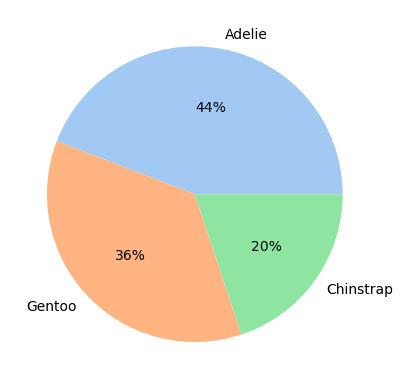

In [98]:
species_count = cleaned_data['species'].value_counts()
plt.pie(species_count, autopct='%.0f%%', labels=species_count.index)
plt.show

样本中`Adelie`这个种类的企鹅占比最大，`Gentoo`种类的占比次之，`Chinstrap`的占比最小，为1/5左右。

#### 企鹅岛屿比例

<function matplotlib.pyplot.show(close=None, block=None)>

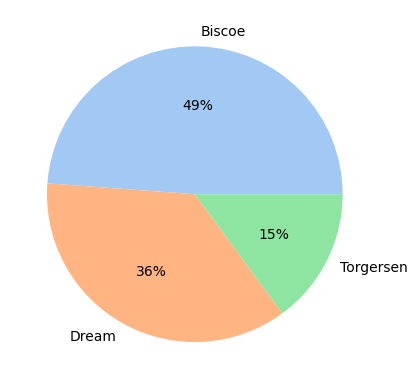

In [108]:
island_count = cleaned_data["island"].value_counts()
plt.pie(island_count, autopct="%.0f%%", labels=island_count.index)
plt.show

样本中一半左右的企鹅样本都来自`Biscoe`岛屿，占比最大，其次是`Dream`岛屿，来自`Torgersen`岛屿的样本最少。

#### 企鹅性别分布

<function matplotlib.pyplot.show(close=None, block=None)>

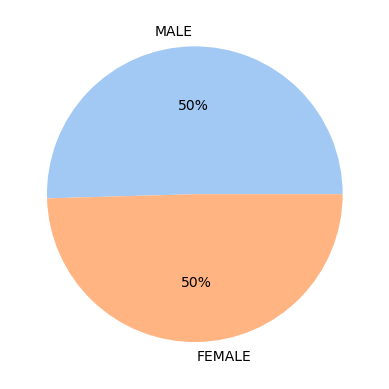

In [112]:
sex_count = cleaned_data["sex"].value_counts()
plt.pie(sex_count, autopct="%.0f%%", labels=sex_count.index)
plt.show

样本企鹅的性别占比持平，符合随机抽样。

#### 不同岛上的企鹅种类数量

<Axes: xlabel='island', ylabel='count'>

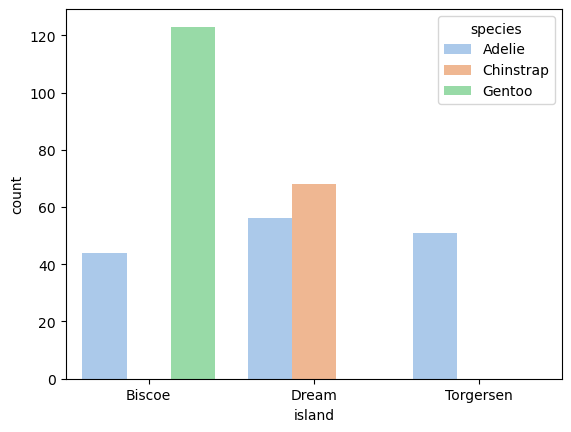

In [116]:
sns.countplot(cleaned_data, x="island", hue="species")

`Adelie`在三个岛上都有。`Gentoo`只有在Biscoe上有，`Chinstrap`只有在Dream island上有

#### 不同岛屿上的企鹅性别数量

<Axes: xlabel='island', ylabel='count'>

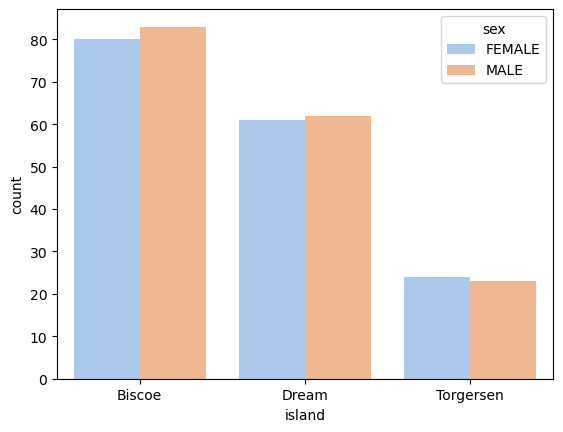

In [120]:
sns.countplot(cleaned_data, x="island", hue="sex")

每个岛上的企鹅数量差距不大

### 查看数值之间的相关关系

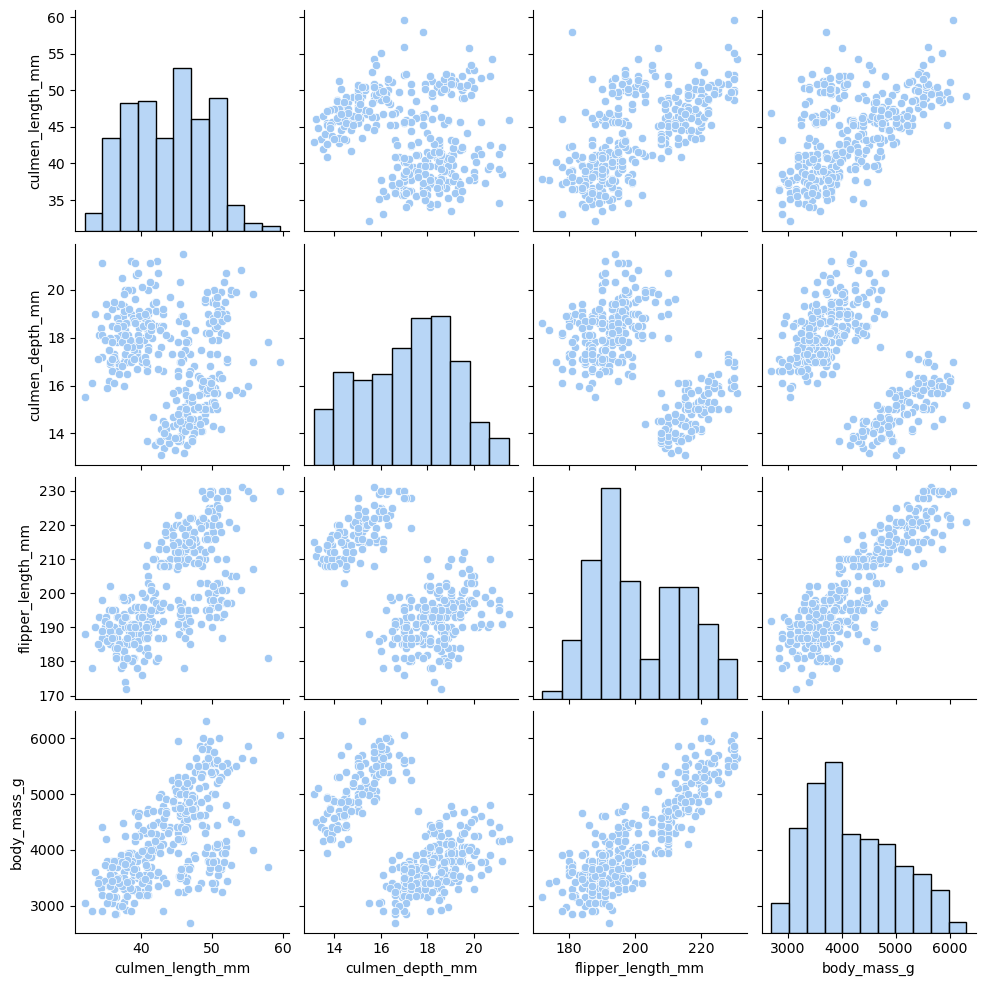

In [124]:
sns.pairplot(cleaned_data)


从直方图来看，企鹅样本的嘴峰长度、嘴峰深度、鳍长度、体重的分布不是正态分布。一方面说明，这里面可能包含了多组存在差异的样本数据，另一方面也说明样本数不够大。

另外可以在散点图中看出明显的多个集群，可能与某些因素有关，比如企鹅种类、性别，因此可以对对比进行进一步的分类。

### 根据种类查看数值之间的相关关系

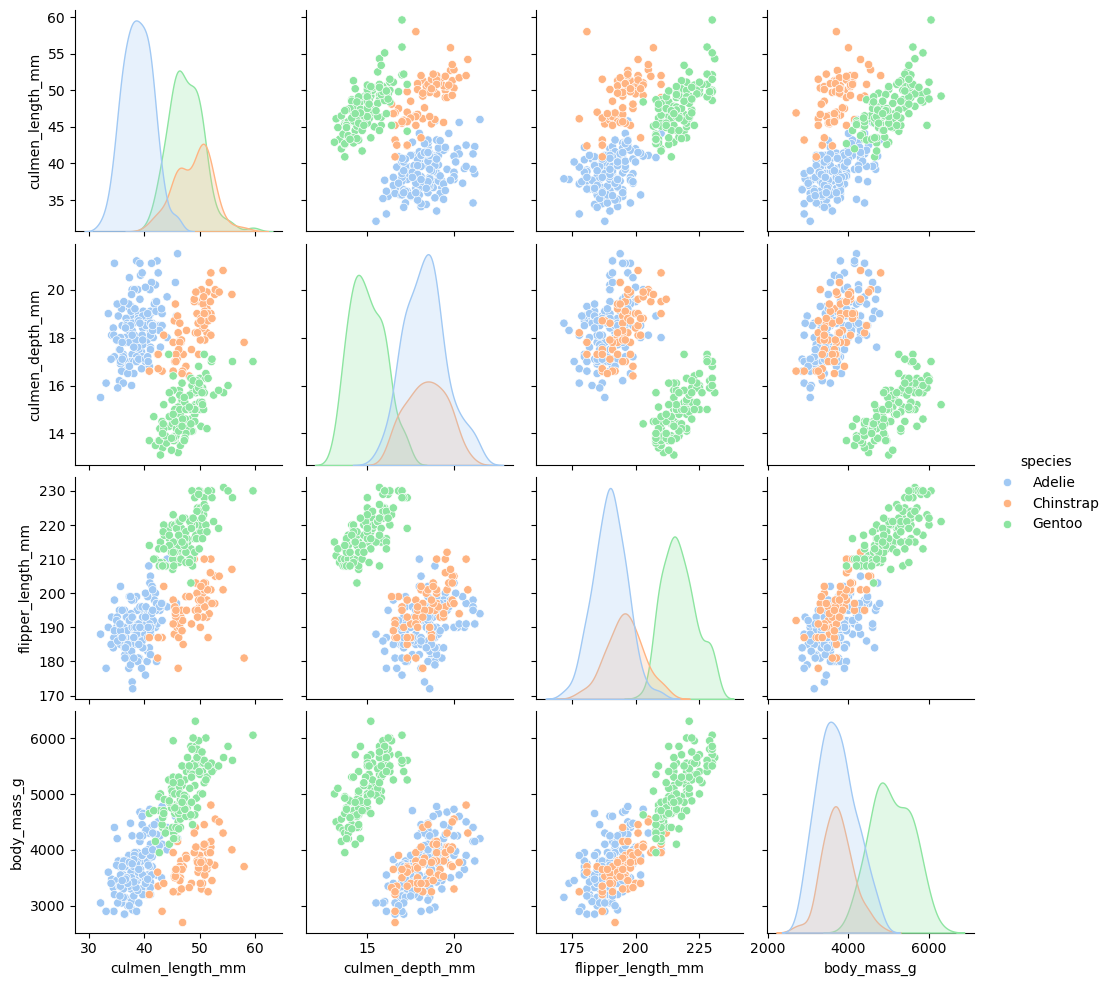

In [130]:
sns.pairplot(cleaned_data, hue="species")